<a href="https://colab.research.google.com/github/navishr12/detection_of_facemask/blob/main/facemask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
mask_files=os.listdir("/content/drive/MyDrive/Training Data/with_mask")
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_487.jpg', 'with_mask_493.jpg', 'with_mask_495.jpg', 'with_mask_483.jpg', 'with_mask_465.jpg']
['with_mask_16.jpg', 'with_mask_17.jpg', 'with_mask_500.jpg', 'with_mask_60.jpg', 'with_mask_4.jpg']


In [5]:
nomask_files=os.listdir('/content/drive/MyDrive/Training Data/without_mask')
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_487.jpg', 'with_mask_493.jpg', 'with_mask_495.jpg', 'with_mask_483.jpg', 'with_mask_465.jpg']
['with_mask_16.jpg', 'with_mask_17.jpg', 'with_mask_500.jpg', 'with_mask_60.jpg', 'with_mask_4.jpg']


In [6]:
print(f'Number of image with mask:{len(mask_files)}')
print(f'Number of image without mask:{len(nomask_files)}')

Number of image with mask:500
Number of image without mask:500


In [8]:
# create the labels
mask_labels = [1]*500
withoutmask_labels = [0]*500

In [9]:
print(mask_labels[0:5])
print(withoutmask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
labels=mask_labels + withoutmask_labels
print(len(labels))


1000


In [11]:
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


<function matplotlib.pyplot.show(close=None, block=None)>

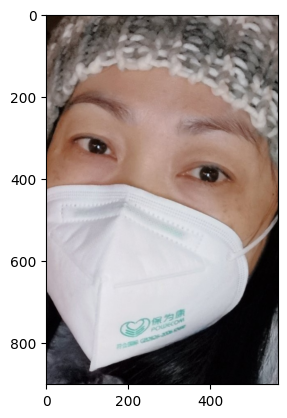

In [12]:
img=mpimg.imread('/content/drive/MyDrive/Training Data/with_mask/with_mask_101.jpg')
implot= plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

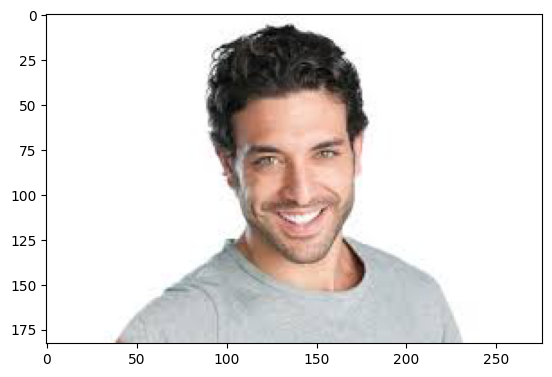

In [16]:
#display no mask
img=mpimg.imread('/content/drive/MyDrive/Training Data/without_mask/without_mask_1000.jpg')
implot= plt.imshow(img)
plt.show

In [17]:
#image processing
with_mask_path ='/content/drive/MyDrive/Training Data/with_mask/'
mask_files =os.listdir(with_mask_path)
data=[]
for img_file in mask_files:
  image= Image.open(with_mask_path +str(img_file))
  image= image.resize((128,128))
  image= image.convert('RGB')
  image= np.array(image)
  data.append(image)


without_mask_path ='/content/drive/MyDrive/Training Data/without_mask/'
mask_files =os.listdir(without_mask_path)

for img_file in nomask_files:
  image= Image.open(without_mask_path +str(img_file))
  image= image.resize((128,128))
  image= image.convert('RGB')
  image= np.array(image)
  data.append(image)

In [18]:
type(data),len(data)

(list, 1000)

In [19]:
data[0]

array([[[ 39,  37,  38],
        [ 43,  41,  42],
        [ 49,  47,  48],
        ...,
        [233, 230, 236],
        [233, 231, 237],
        [233, 231, 237]],

       [[ 52,  50,  51],
        [ 56,  54,  55],
        [ 62,  60,  61],
        ...,
        [233, 231, 236],
        [234, 232, 237],
        [232, 230, 235]],

       [[ 67,  65,  66],
        [ 65,  63,  64],
        [ 64,  62,  63],
        ...,
        [227, 225, 230],
        [236, 234, 239],
        [237, 235, 240]],

       ...,

       [[137,  88,  83],
        [134,  86,  80],
        [134,  86,  79],
        ...,
        [ 92,  92,  94],
        [ 92,  92,  94],
        [ 93,  93,  95]],

       [[137,  88,  83],
        [135,  85,  80],
        [133,  86,  78],
        ...,
        [ 92,  92,  94],
        [ 95,  95,  97],
        [ 96,  96,  98]],

       [[137,  90,  85],
        [134,  87,  80],
        [131,  84,  76],
        ...,
        [ 94,  93,  97],
        [ 98,  97, 101],
        [ 99,  99, 103]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#converting

x = np.array(data)
y = np.array(labels)

In [23]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
print(x_train.shape,x_test.shape)

(800, 128, 128, 3) (200, 128, 128, 3)


In [25]:
#scalling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

building the cnn model

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
num_of_classes =2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))#convolution layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))#pooling layer

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))#2nd convolution layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))#pooling layer

model.add(keras.layers.Flatten())#converting into a one dim row of values

model.add(keras.layers.Dense(128, activation='relu'))#hidden layer for the fully connected layer
model.add(keras.layers.Dropout(0.5))

#model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))#output layer of the fully connected layer


In [28]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [29]:
#training the neural networks
history = model.fit(x_train_scaled,y_train, validation_split=0.1, epochs=5)

Epoch 1/5
23/23 [==============================] - 15s 590ms/step - loss: 0.8116 - acc: 0.7431 - val_loss: 0.1759 - val_acc: 0.9750
Epoch 2/5
23/23 [==============================] - 18s 774ms/step - loss: 0.1711 - acc: 0.9417 - val_loss: 0.0933 - val_acc: 0.9875
Epoch 3/5
23/23 [==============================] - 15s 626ms/step - loss: 0.1295 - acc: 0.9583 - val_loss: 0.0861 - val_acc: 0.9625
Epoch 4/5
23/23 [==============================] - 13s 588ms/step - loss: 0.0802 - acc: 0.9778 - val_loss: 0.0506 - val_acc: 0.9875
Epoch 5/5
23/23 [==============================] - 13s 584ms/step - loss: 0.0558 - acc: 0.9819 - val_loss: 0.0427 - val_acc: 0.9750


model evaulation


In [30]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy =',accuracy)

7/7 [==============================] - 1s 149ms/step - loss: 0.1307 - acc: 0.9550
Test Accuracy = 0.9549999833106995


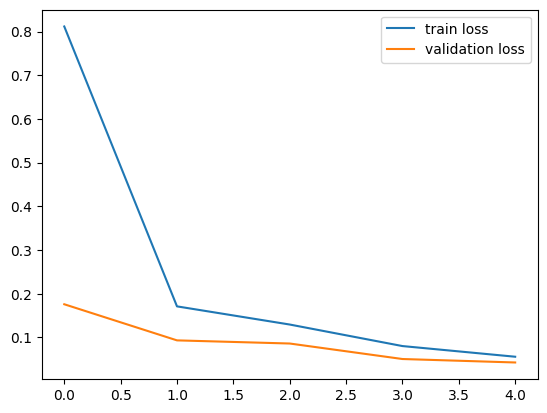

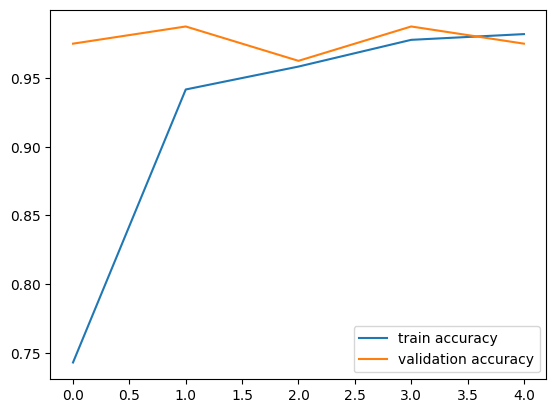

In [31]:
h = history
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/naveenwithmask (2).jpg


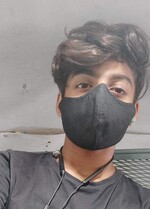

1/1 [==============================] - 0s 25ms/step
[[0.40229112 0.74474144]]
1
The person in the image is wearing a mask


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/IMG_3127 (1).jpg


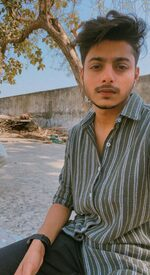

1/1 [==============================] - 0s 25ms/step
[[0.80872196 0.37944302]]
0
The person in the image is not wearing a mask


In [62]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')